# Multilayer Perceptron 
* É uma rede neural semelhante a perceptron, mas com mais de uma camada de neurônios de alimentação direta. Tal tipo de rede é composta por camadas de neurônios lidados entre si por sinapses com pesos. O aprendizado deste tipo de rede é geralmente feito por meio de algorítimos de retro-propagação do erro. 

In [73]:
#install.packages("sna")


In [72]:
library(neuralnet)
library(mltools)
library(data.table)
library(caret)


## Dimensionamentos de Características - Padronização
---

In [22]:
iris2 = scale(iris[,1:4])

In [24]:
## transformando a matrix em dataframe
iris2 = as.data.frame(iris2)

In [26]:
## Adicionando a classe
iris2$Species = iris$Species

In [27]:
head(iris2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-0.8976739,1.01560199,-1.335752,-1.311052,setosa
2,-1.1392005,-0.13153881,-1.335752,-1.311052,setosa
3,-1.3807271,0.32731751,-1.392399,-1.311052,setosa
4,-1.5014904,0.09788935,-1.279104,-1.311052,setosa
5,-1.0184372,1.24503015,-1.335752,-1.311052,setosa
6,-0.5353840,1.93331463,-1.165809,-1.048667,setosa


In [30]:
num = dim(iris2)[1]

In [31]:
## Dividindo o Dataframe entre treino e teste com o pacote caret
particao = createDataPartition(1:num,p=.7)
particao 

$Resample1
  [1]   1   2   6   7   8  10  11  12  13  14  16  17  18  19  20  21  22  23
 [19]  24  25  26  28  30  32  35  37  38  40  41  42  43  44  46  50  51  53
 [37]  54  55  56  57  59  60  63  64  66  67  68  69  70  71  73  74  75  76
 [55]  77  78  79  80  81  84  85  87  89  90  92  93  95  96  97  98 101 102
 [73] 103 104 105 106 107 108 111 113 114 115 116 117 118 120 122 123 125 126
 [91] 127 128 130 133 135 137 138 139 140 141 143 144 146 148 149 150

In [36]:
treino = iris2[particao$Resample1,]
teste = iris2[-particao$Resample1,]
dim(treino)
dim(teste)

[1] 106   5

[1] 44  5

In [38]:
## One hot encoding para a classe: transformar as categorias em números
treino = cbind(treino[,1:4], one_hot(as.data.table(treino[,5])))
treino

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,V1_setosa,V1_versicolor,V1_virginica
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,-0.8976739,1.01560199,-1.335752,-1.3110521,1,0,0
2,-1.1392005,-0.13153881,-1.335752,-1.3110521,1,0,0
6,-0.5353840,1.93331463,-1.165809,-1.0486668,1,0,0
7,-1.5014904,0.78617383,-1.335752,-1.1798595,1,0,0
8,-1.0184372,0.78617383,-1.279104,-1.3110521,1,0,0
10,-1.1392005,0.09788935,-1.279104,-1.4422448,1,0,0
11,-0.5353840,1.47445831,-1.279104,-1.3110521,1,0,0
12,-1.2599638,0.78617383,-1.222456,-1.3110521,1,0,0
13,-1.2599638,-0.13153881,-1.335752,-1.4422448,1,0,0


In [80]:
names(treino)

[1] "Sepal.Length"  "Sepal.Width"   "Petal.Length"  "Petal.Width"  
[5] "V1_setosa"     "V1_versicolor" "V1_virginica"

## Produção do modelo
---

In [41]:
model = neuralnet(V1_setosa + V1_versicolor + V1_virginica ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
                 treino, hidden=c(5,4))

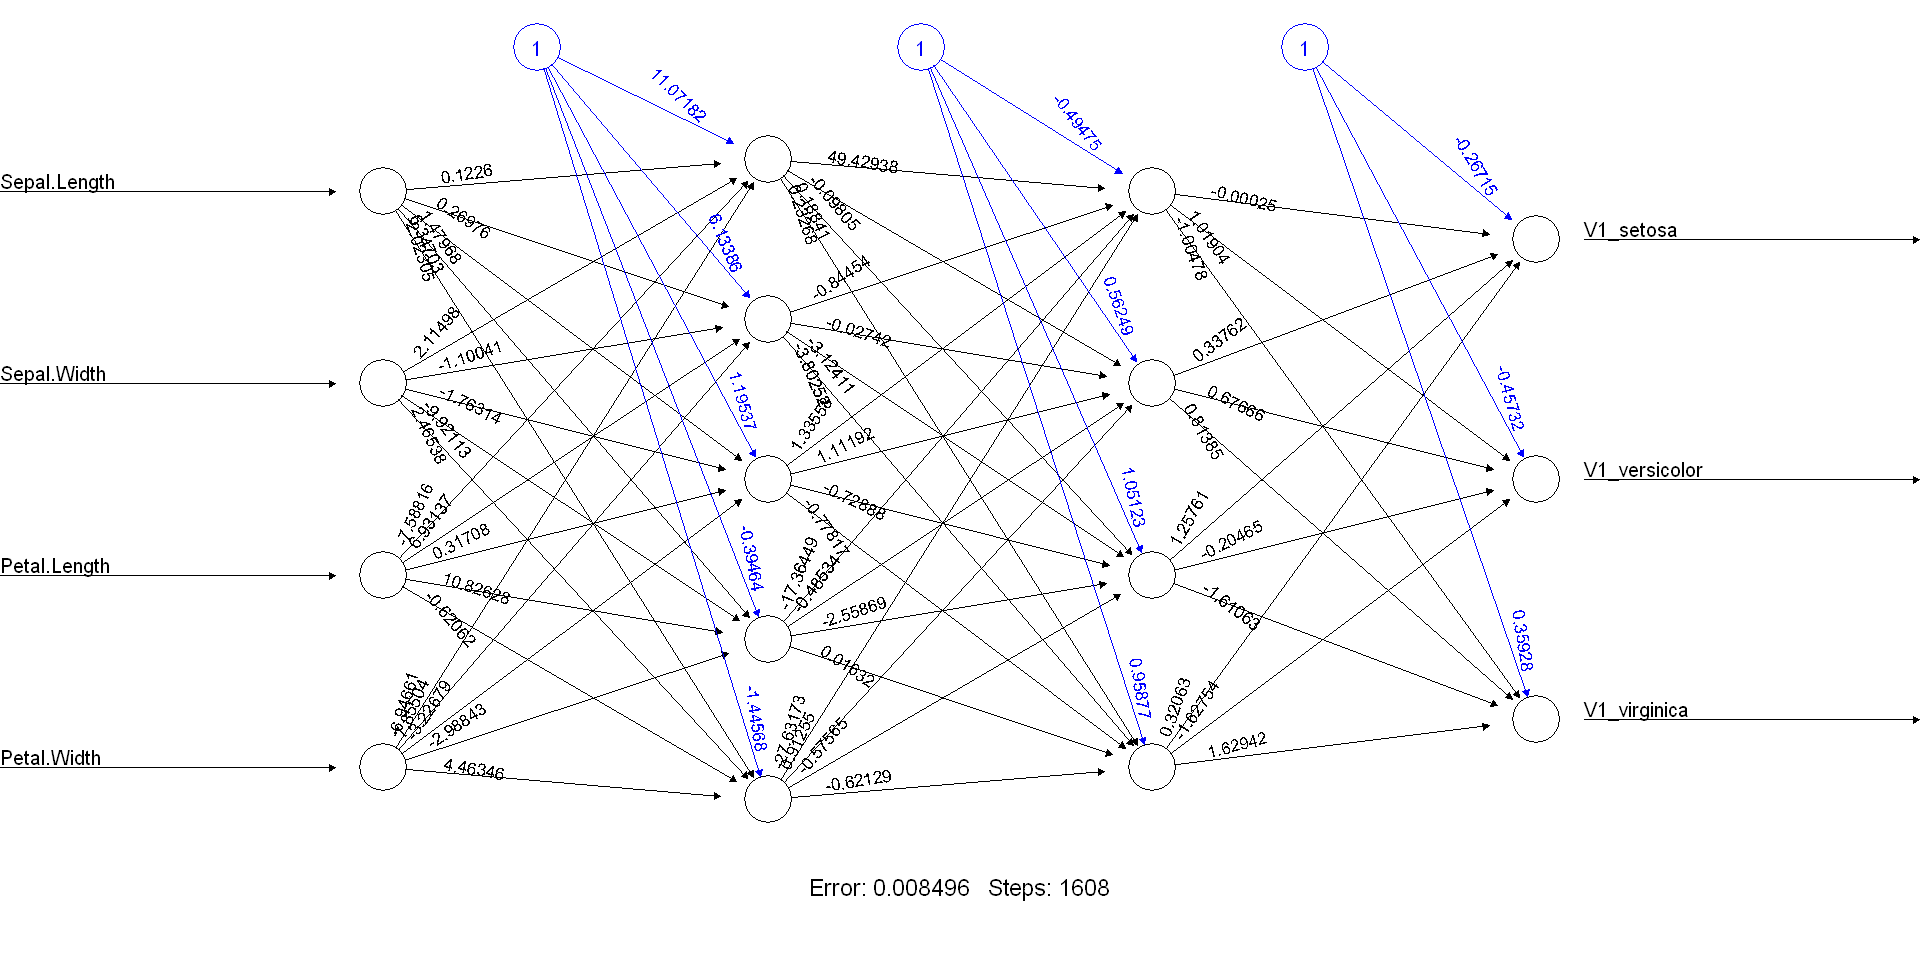

In [75]:
options(repr.plot.width = 16, repr.plot.height = 8)
plot(model, rep="best")

## Previsão
---

In [76]:
# Atribuição de pesos
predict = compute(model, teste[,1:4])
predict$net.result

3,1.000645e+00,-3.431667e-03,-1.182062e-03
4,9.995816e-01,-1.401679e-03,-7.139504e-04
5,1.002568e+00,-6.092715e-03,-1.785735e-03
9,9.975465e-01,2.609307e-03,2.086289e-04
15,9.995172e-01,7.300666e-04,-2.036980e-04
27,1.003465e+00,-7.986211e-03,-2.232975e-03
29,1.000029e+00,-2.223861e-03,-9.026809e-04
31,9.977963e-01,2.114869e-03,9.475703e-05
33,9.946483e-01,1.320548e-02,2.629521e-03
34,9.938020e-01,1.574472e-02,3.194095e-03
36,9.981054e-01,1.531717e-03,-3.771125e-05


In [77]:
# Data Frame
predict = as.data.frame(predict$net.result)
predict

,V1,V2,V3
,<dbl>,<dbl>,<dbl>
3,1.000645e+00,-3.431667e-03,-1.182062e-03
4,9.995816e-01,-1.401679e-03,-7.139504e-04
5,1.002568e+00,-6.092715e-03,-1.785735e-03
9,9.975465e-01,2.609307e-03,2.086289e-04
15,9.995172e-01,7.300666e-04,-2.036980e-04
27,1.003465e+00,-7.986211e-03,-2.232975e-03
29,1.000029e+00,-2.223861e-03,-9.026809e-04
31,9.977963e-01,2.114869e-03,9.475703e-05
33,9.946483e-01,1.320548e-02,2.629521e-03


In [82]:
## Atribuindo nomes as colunas conforme a classe para avaliação da performance do modelo 
names(predict)[1] = 'setosa'
names(predict)[2] = 'versicolor'
names(predict)[3] = 'virginica'


In [85]:
## Preenchendo uma coluna com os nomes da classe predominante em cada linha 
predict$class = colnames(predict[,1:3])[max.col(predict[,1:3], ties.method='first')]
predict


,setosa,versicolor,virginica,class
,<dbl>,<dbl>,<dbl>,<chr>
3,1.000645e+00,-3.431667e-03,-1.182062e-03,setosa
4,9.995816e-01,-1.401679e-03,-7.139504e-04,setosa
5,1.002568e+00,-6.092715e-03,-1.785735e-03,setosa
9,9.975465e-01,2.609307e-03,2.086289e-04,setosa
15,9.995172e-01,7.300666e-04,-2.036980e-04,setosa
27,1.003465e+00,-7.986211e-03,-2.232975e-03,setosa
29,1.000029e+00,-2.223861e-03,-9.026809e-04,setosa
31,9.977963e-01,2.114869e-03,9.475703e-05,setosa
33,9.946483e-01,1.320548e-02,2.629521e-03,setosa


## Performance: matriz de confusão 
---

In [86]:
# Errou apenas 1
conf = table(predict$class, teste$Species)
conf

            
             setosa versicolor virginica
  setosa         16          0         0
  versicolor      0         14         1
  virginica       0          0        13

In [87]:
sum(diag(conf) * 100/ sum(conf))

[1] 97.72727